# Iris Dataset Classification :-

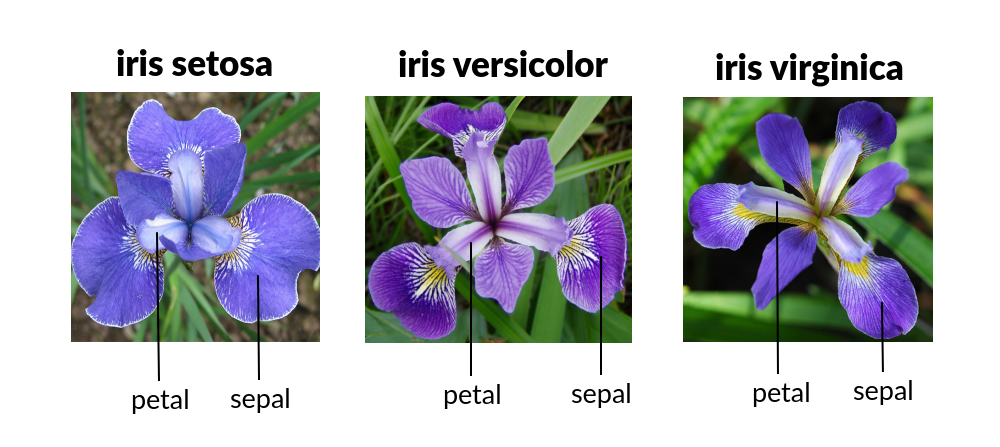

In [1]:
from IPython import display
display.Image("C:\\Users\\Rohan\\Desktop\\Irish2.png")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statistics
import statsmodels
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_excel("C:\\Users\\Rohan\\Downloads\\Iris Flower.xlsx")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)
df.index=range(0,len(df))

In [7]:
df.shape

(150, 6)

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='Species', ylabel='count'>

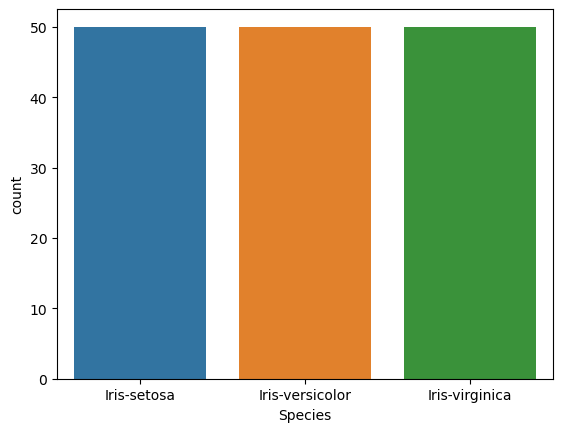

In [9]:
sns.countplot(data=df,x='Species')

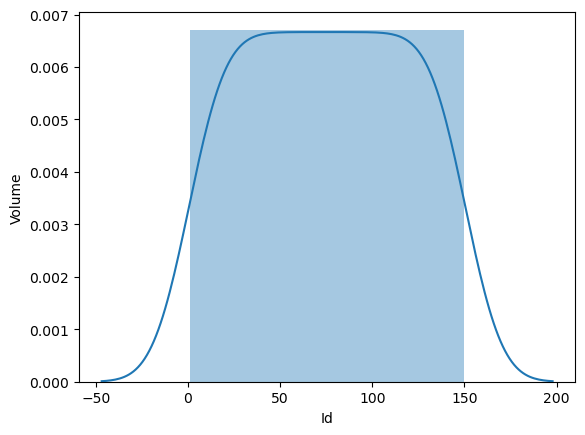

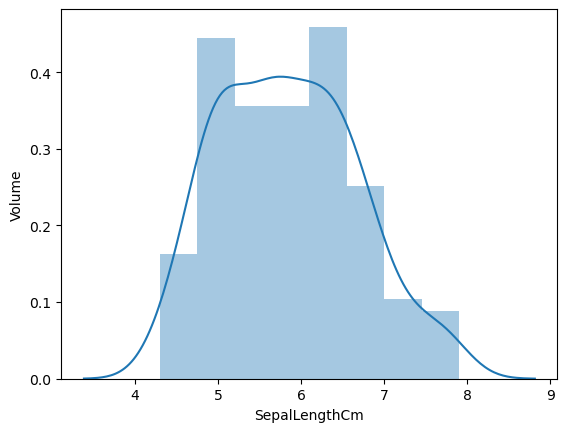

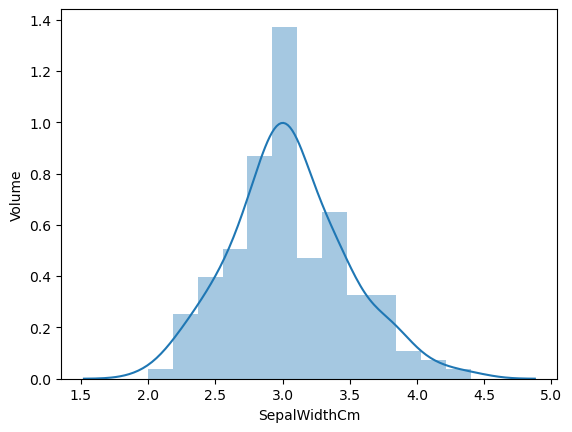

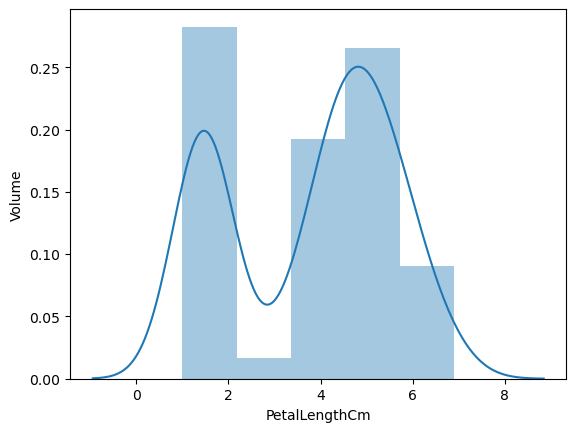

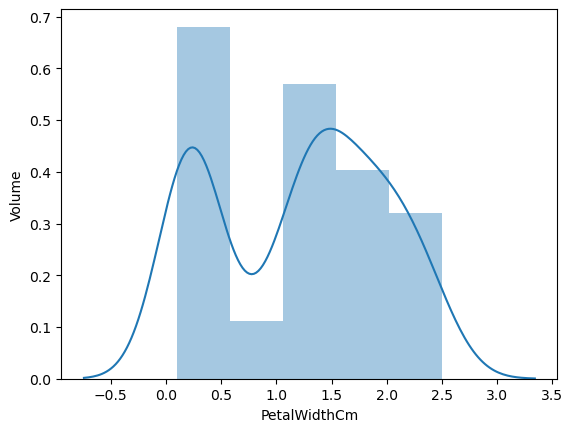

In [10]:
for i in df.iloc[:,0:-1].columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Volume')
    plt.show()

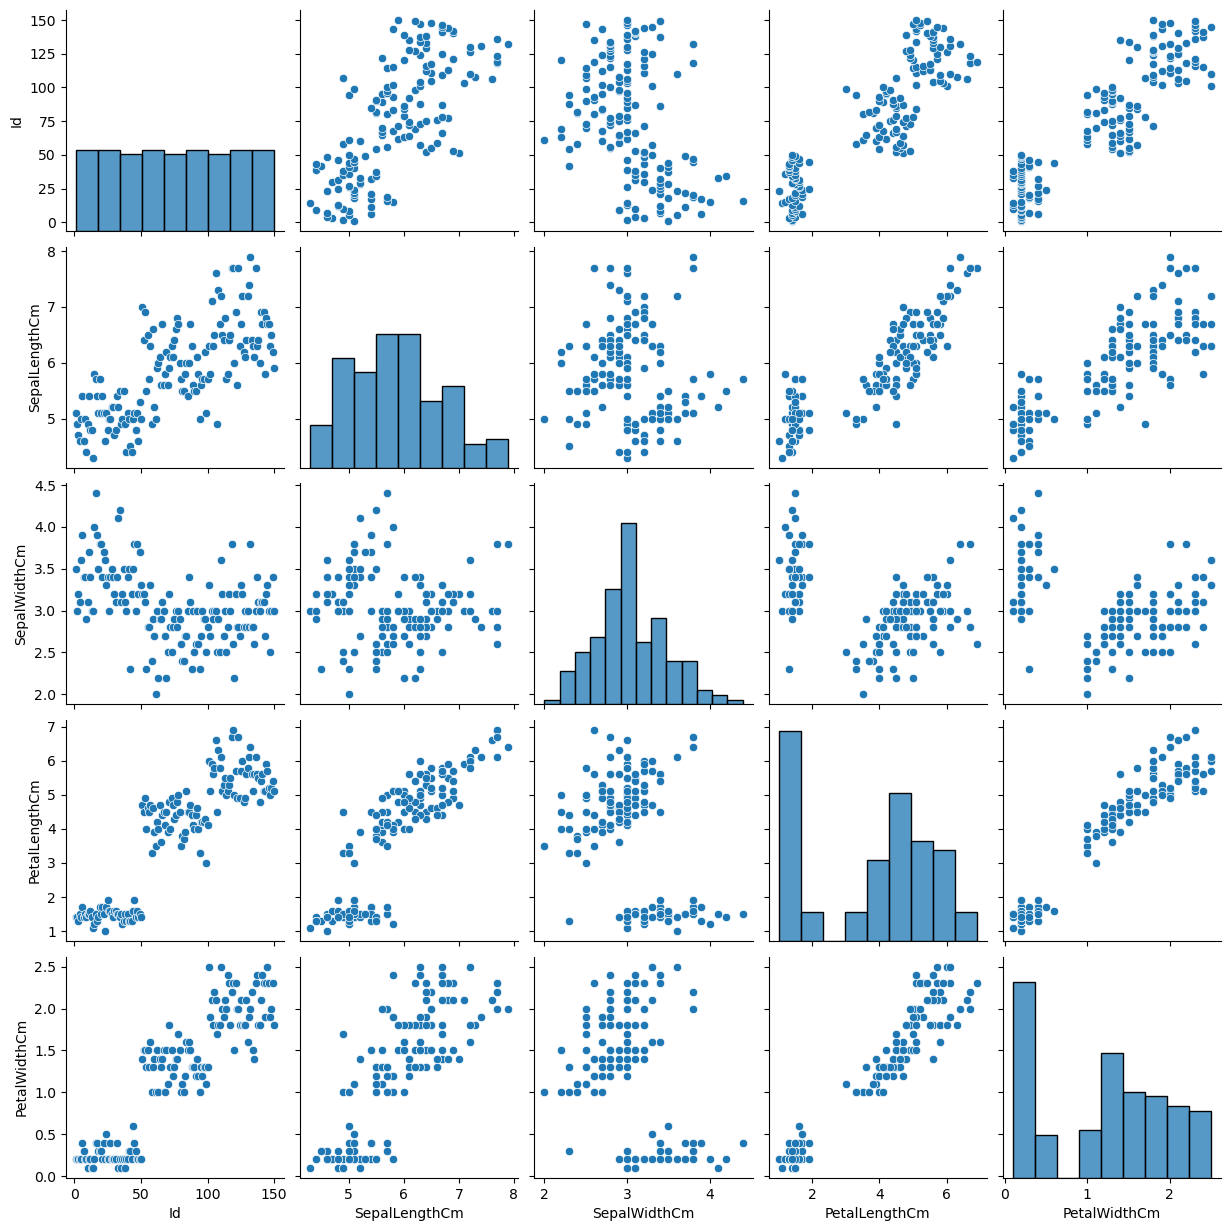

In [11]:
sns.pairplot(df)

In [12]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for l in df.columns:
    if df[l].dtype == 'object':
        df[l]=lab.fit_transform(df[l])

## Correlation

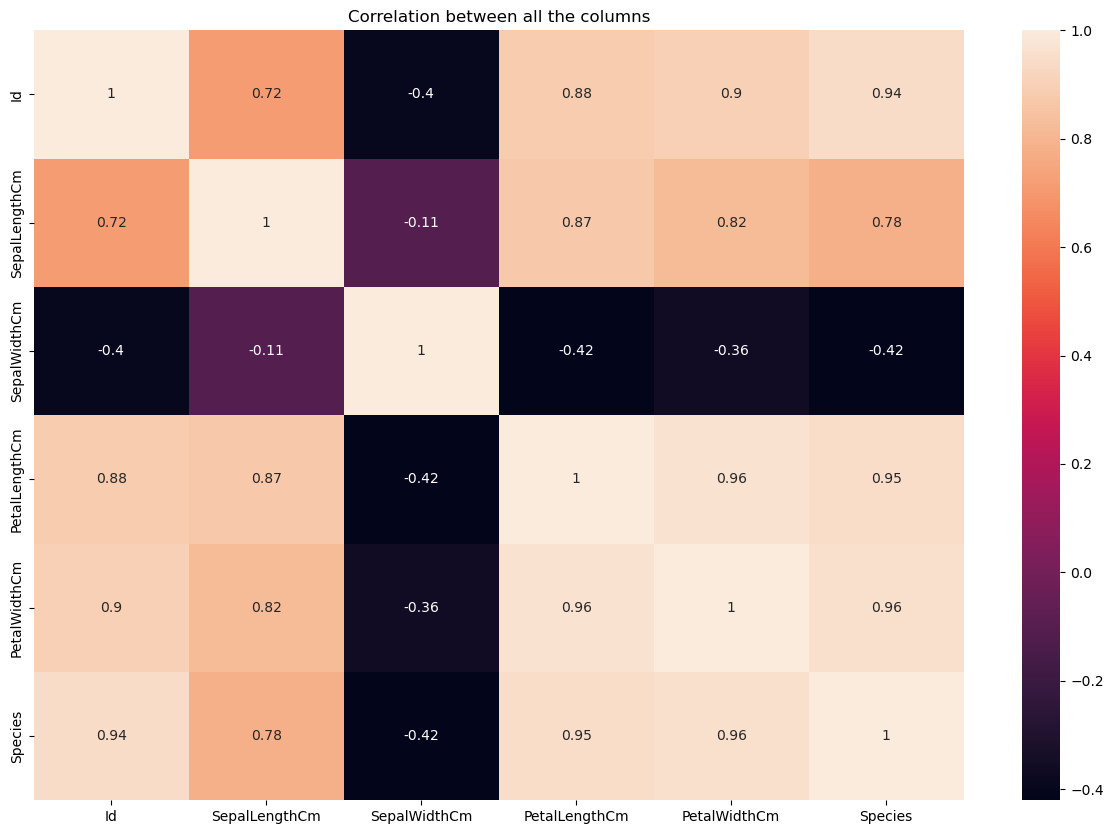

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between all the columns')
plt.show()

## VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=df.drop(['Species'],axis=1)
vif=pd.DataFrame({'Columns':v.columns})
vif['VIF']=[variance_inflation_factor(v.values,r)
           for r in range(len(v.columns))]
vif

,Columns,VIF
0,Id,21.368048
1,SepalLengthCm,264.753379
2,SepalWidthCm,97.140452
3,PetalLengthCm,176.642204
4,PetalWidthCm,62.620584


In [15]:
df.drop(['Id'],axis=1,inplace=True)

## Outlirs

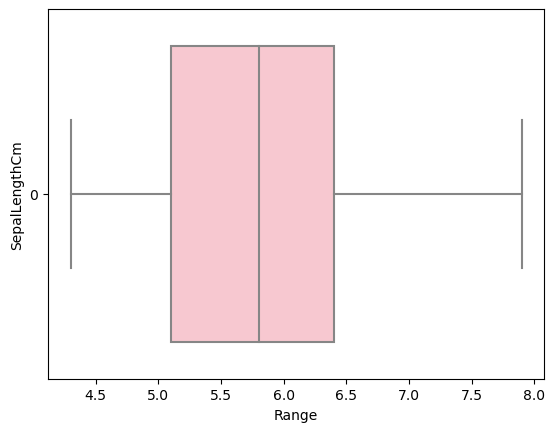

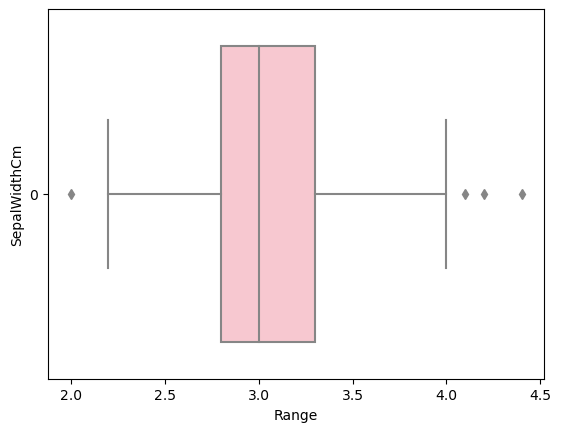

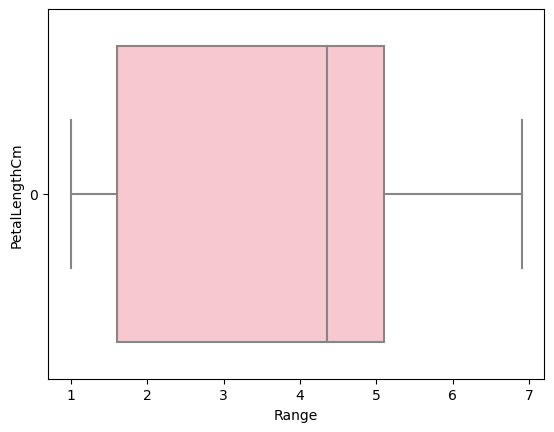

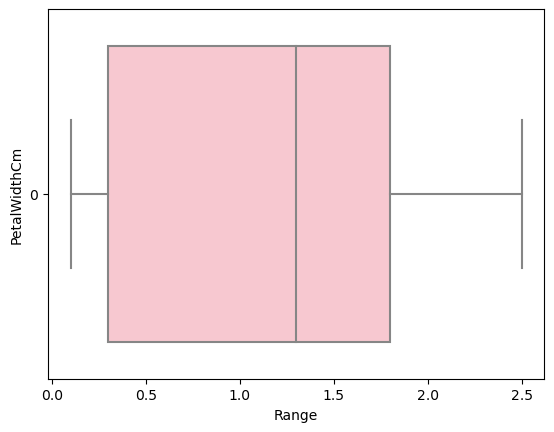

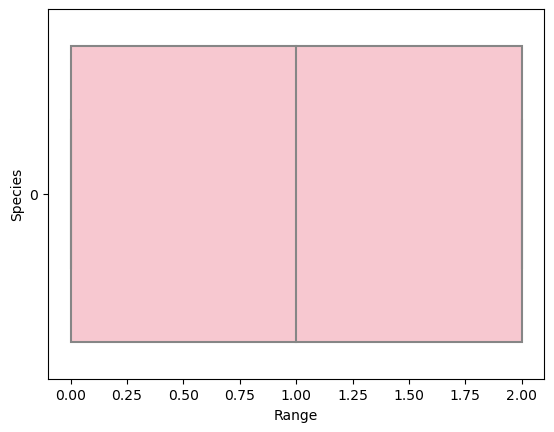

In [16]:
for o in df.columns:
    sns.boxplot(df[o],orient='h',color='pink')
    plt.xlabel('Range')
    plt.ylabel(o)
    plt.show()

In [17]:
X=df.drop(['Species'],axis=1)
Y=df['Species']

In [18]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X1=std.fit_transform(X)

In [19]:
!pip install optimal-data-selector

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from optimal_data_selector.optimal import OptimalDataSelector
x_train,x_test,y_train,y_test=OptimalDataSelector(predictor=X1,target=Y,combination=7000,train_size=0.7)

Accuracy can be ~ 1.0
Computation time = 4.646290862560273  mints


In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105, 1), (45, 1))

In [22]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y,train_size=0.7,random_state=0)

In [23]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((105, 4), (45, 4), (105,), (45,))

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
log.score(x_test,y_test)

1.0

In [26]:
log.score(x_train,y_train)

0.9619047619047619

In [27]:
log1=LogisticRegression()
log1.fit(x_train1,y_train1)
log1.score(x_test1,y_test1)

0.9777777777777777

In [28]:
log1.score(x_train,y_train)

0.9619047619047619

In [29]:
y_pre=log.predict(x_test)

## Performing metrics

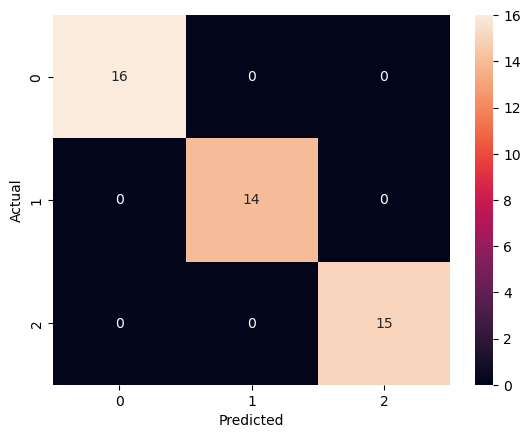

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=12)
dis.fit(x_train,y_train)
dis.score(x_test,y_test)

1.0

In [33]:
dis.score(x_train,y_train)

1.0

In [34]:
y_pre_dis=dis.predict(x_test)

## Preforming metrices 

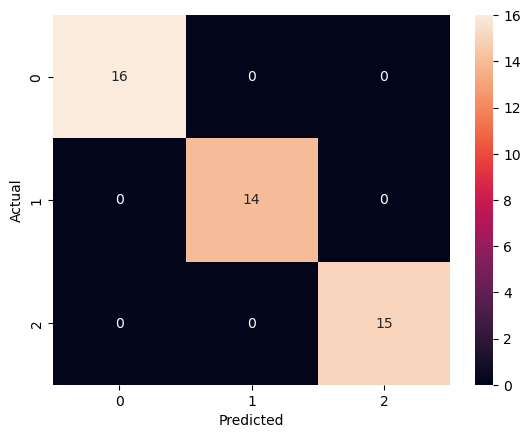

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pre_dis),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
print(classification_report(y_test,y_pre_dis))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(random_state=12)
ran.fit(x_train,y_train)
ran.score(x_test,y_test)

1.0

In [38]:
ran.score(x_train,y_train)

1.0

In [39]:
y_pre_ran = ran.predict(x_test)

## Preforming metrices

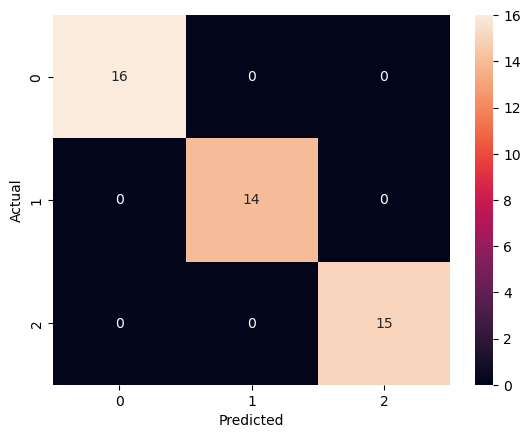

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pre_ran),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
print(classification_report(y_test,y_pre_ran))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# SVM

In [42]:
from sklearn.svm import SVC
pre=0
ker=['rbf','poly','linear','sigmoid']
for i in ker:
    svm=SVC(kernel=i)
    svm.fit(x_train,y_train)
    print('For kernel = ',i,' accuracy is = '+str(svm.score(x_test,y_test)))
    print('Training accuracy is = '+str(svm.score(x_train,y_train)))
    pre=svm.predict(x_test)
    print('Classification_report')
    print(classification_report(y_test,pre))
    print()

For kernel =  rbf  accuracy is = 1.0
Training accuracy is = 0.9809523809523809
Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


For kernel =  poly  accuracy is = 0.9333333333333333
Training accuracy is = 0.9428571428571428
Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.93      0.90        14
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


For kernel =  line

In [43]:
svm1=SVC(kernel='rbf')
svm1.fit(x_train,y_train)
svm1.score(x_test,y_test)

1.0

In [44]:
svm1.score(x_train,y_train)

0.9809523809523809

In [45]:
y_pre_svm=svm1.predict(x_test)

## Performing metrics

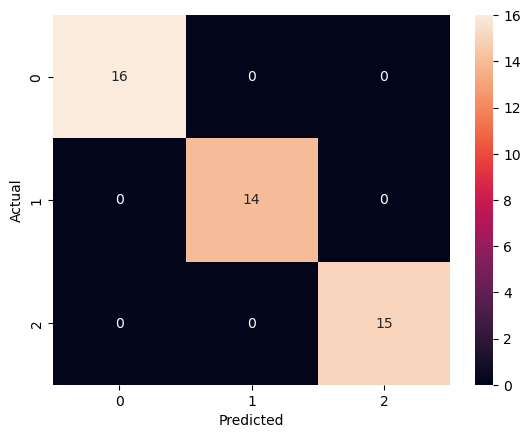

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pre_svm),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
print(classification_report(y_test,y_pre_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# KNN

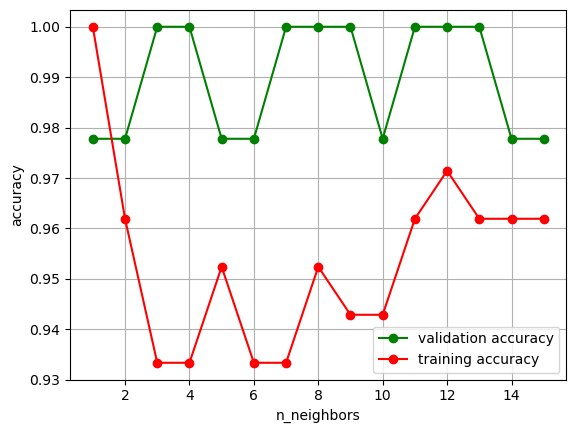

In [48]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
train=[]
n=[]
for k in range(1,16):
    knn1=KNeighborsClassifier(n_neighbors=k)
    knn1.fit(x_train,y_train)
    acc.append(knn1.score(x_test,y_test))
    train.append(knn1.score(x_train,y_train))
    n.append(k)
plt.plot(n,acc,color='green',marker='o',label='validation accuracy')
plt.plot(n,train,color='red',marker='o',label='training accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

In [49]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0

In [50]:
knn.score(x_train,y_train)

0.9619047619047619

In [51]:
y_pre_knn=knn.predict(x_test)

## Performing metrices

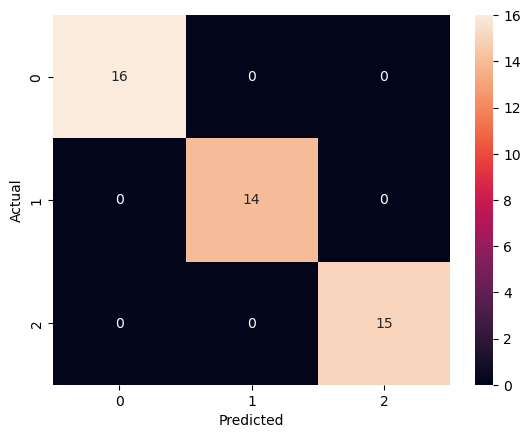

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pre_knn),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Naive bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

1.0

In [55]:
nb.score(x_train,y_train)

0.9523809523809523

In [56]:
y_pre_nb=nb.predict(x_test)

## Performing metrices

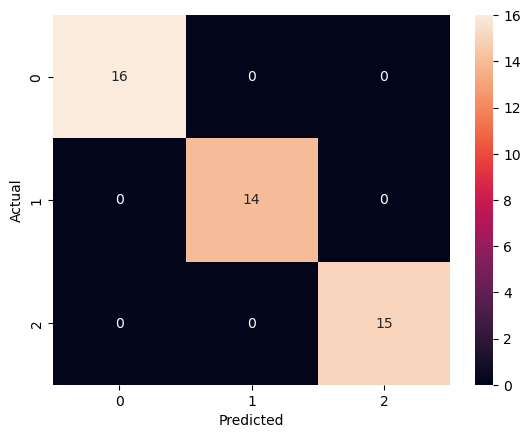

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pre_nb),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
print(classification_report(y_test,y_pre_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Models accuracy

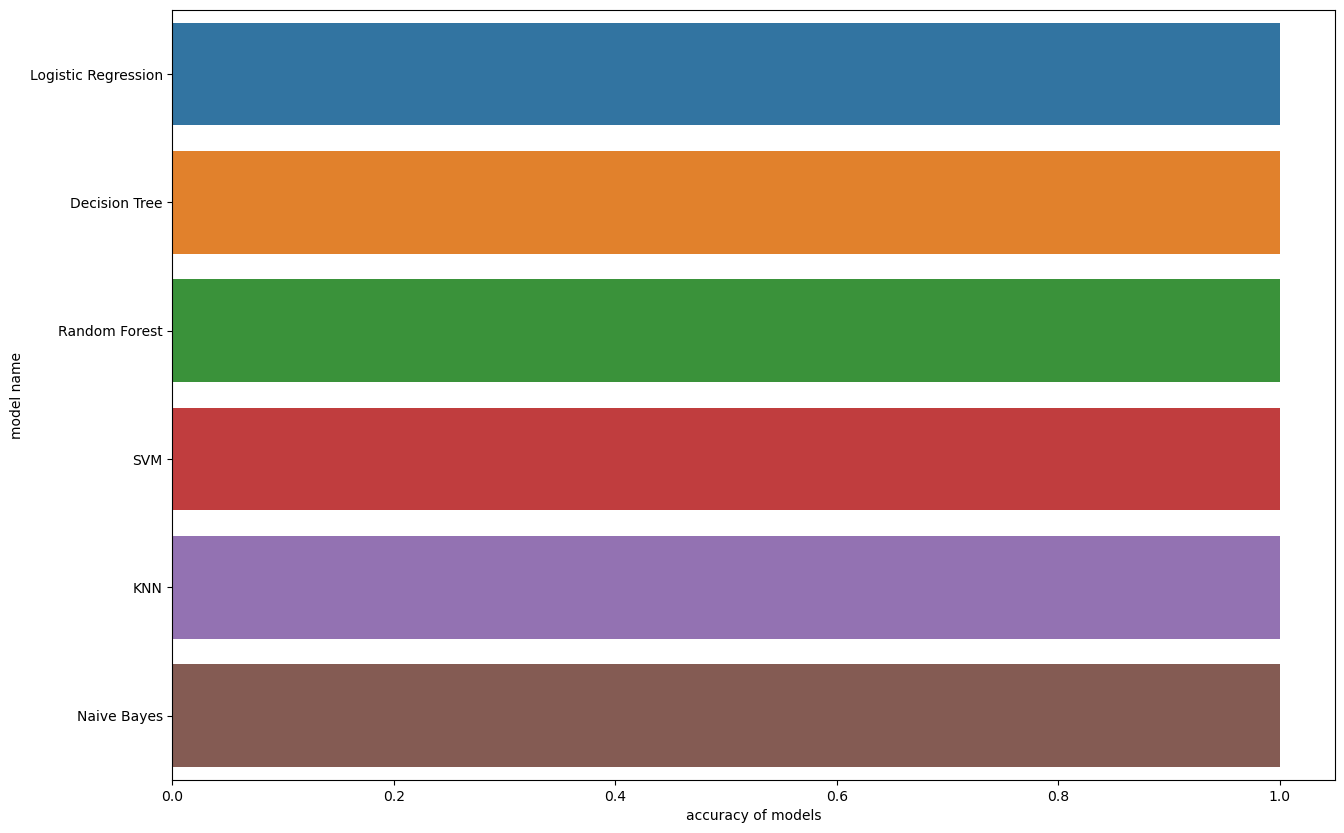

In [59]:
acc_df=pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Naive Bayes'],
                    'Accuracy':[log.score(x_test,y_test),dis.score(x_test,y_test),ran.score(x_test,y_test),
                               svm1.score(x_test,y_test),knn.score(x_test,y_test),nb.score(x_test,y_test)]})
plt.figure(figsize=(15,10))
sns.barplot(x=acc_df['Accuracy'],y=acc_df['Models'])
plt.xlabel('accuracy of models')
plt.ylabel('model name')
plt.show()

## Model's training and validation accuracy

In [60]:
acc_df.rename(columns={'Accuracy':'Accuracy(validation)'},inplace=True)
mod=[log,dis,ran,svm1,knn,nb]
acc_tr=[]
for i in mod:
    acc_tr.append(i.score(x_train,y_train))
acc_df['Accuracy(training)'] = acc_tr
acc_df

,Models,Accuracy(validation),Accuracy(training)
0,Logistic Regression,1.0,0.961905
1,Decision Tree,1.0,1.000000
2,Random Forest,1.0,1.000000
3,SVM,1.0,0.980952
4,KNN,1.0,0.961905
5,Naive Bayes,1.0,0.952381


In [61]:
'''                                          Thank You                                           '''

'                                          Thank You                                           '